In [274]:
import os
from pathlib import Path
import extract_msg
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from textblob import TextBlob
from urlextract import URLExtract
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\P70076367\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\P70076367\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [96]:
mainpath = Path(".")

In [97]:
# path_repo = []
def path_collector(path, suffix, path_repo):
    for p in os.listdir(Path(path)):
        if (Path(path) / p).is_dir():
            path_collector(Path(path) / p, suffix, path_repo)
        elif (Path(path) / p).is_file(): 
            if ((Path(path) / p).suffix).lower() == suffix:
                path_repo.append(Path(path) / p)     

In [ ]:
person_A=""
person_B=""

In [98]:
all_msgs_paths = []
path_collector(mainpath, ".msg", all_msgs_paths)
msg_paths_person_A = []
path_collector(mainpath/"From "+person_A, ".msg", msg_paths_person_A)
msg_paths_person_B = []
path_collector(mainpath/"From "+person_B, ".msg", msg_paths_person_B)

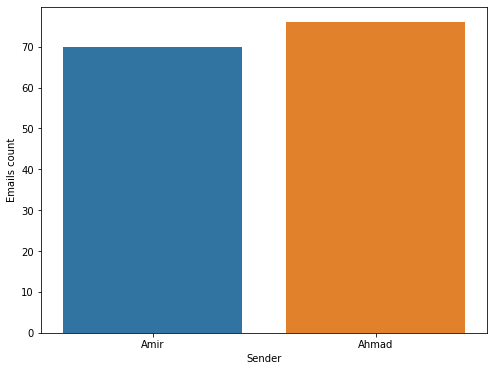

In [99]:
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.barplot(data=pd.DataFrame({"person_A": [len(msg_paths_person_A)], "person_B": [len(msg_paths_person_B)]}))
_ = ax.set_xlabel("Sender")
_ = ax.set_ylabel("Emails count")
plt.savefig("emails_exchangeS.png")

In [107]:
person_A_msgs = [extract_msg.Message(f) for f in msg_paths_person_A]
person_B_msgs = [extract_msg.Message(f) for f in msg_paths_person_B]
all_msgs = person_A_msgs + person_B_msgs

In [115]:
all_msgs_dates = [datetime.strptime(msg.date, "%a, %d %b %Y %X %z") for msg in all_msgs]

In [128]:
day_conversion = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday",}

In [130]:
all_msgs_weekday = [day_conversion[d.weekday()] for d in all_msgs_dates]

In [136]:
days = {}
for day in all_msgs_weekday:
    days[day] = days.get(day, 0) + 1

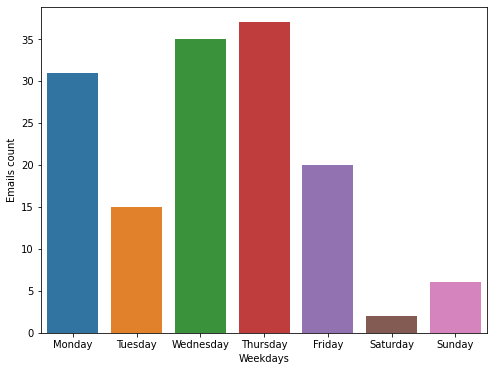

In [146]:
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.barplot(data=pd.DataFrame({q:[days[q]] for p,q in day_conversion.items()}))
_ = ax.set_xlabel("Weekdays")
_ = ax.set_ylabel("Emails count")
plt.savefig("emails_exchange_weekly.png")

In [147]:
all_msgs_hours = [d.hour for d in all_msgs_dates]

In [149]:
hours = {}
for hour in all_msgs_hours:
    hours[hour] = hours.get(hour, 0) + 1

In [157]:
sorted_hours = {}
for i in range(0,24):
    sorted_hours[i] = hours[i] if i in hours else 0

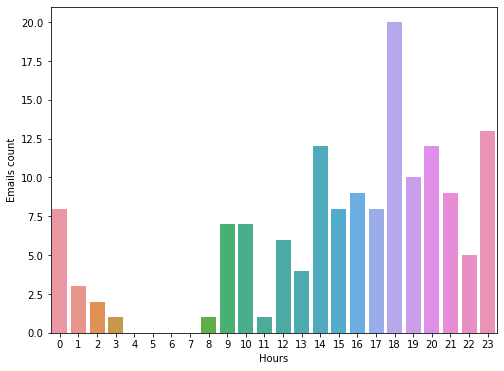

In [160]:
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.barplot(data=pd.DataFrame({hour:[freq] for hour,freq in sorted_hours.items()}))
_ = ax.set_xlabel("Hours")
_ = ax.set_ylabel("Emails count")
plt.savefig("emails_exchange_hours.png")

In [264]:
def text_cleaning(input_text):
    # print(input_text)
    removal_list =["\n", "\r", "\"", "\'", "*",]
    extractor = URLExtract()
    extractor.extract_email = True
    removal_list = removal_list + extractor.find_urls(input_text)
    
    for i in removal_list:
        input_text = input_text.replace(i, "")
        
    # print(removal_list)
    return input_text.strip()

In [265]:
msg_subjects = [msg.subject for msg in all_msgs]

In [266]:
msg_contents = [text_cleaning(msg.body) for msg in person_A_msgs]

In [267]:
msg_subjectivity = [TextBlob(msg).subjectivity for msg in msg_contents]

In [268]:
msg_polarity = [TextBlob(msg).polarity for msg in msg_contents]

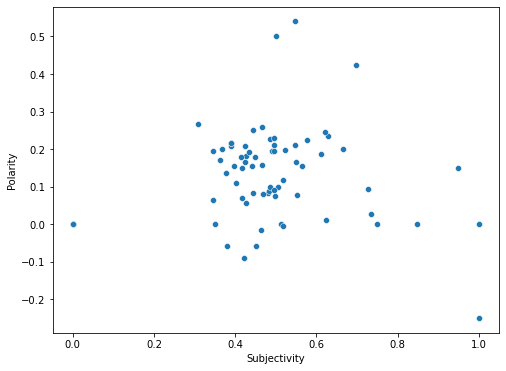

In [269]:
fix, ax = plt.subplots(figsize=(8,6))
_ = sns.scatterplot(x = msg_subjectivity, y = msg_polarity)
_ = ax.set_xlabel("Subjectivity")
_ = ax.set_ylabel("Polarity")
plt.savefig("./sentiment.png")

In [270]:
all_messages = ""
for i in msg_contents:
    all_messages += i

In [271]:
all_msgs_blob = TextBlob(all_messages)

In [287]:
unigrams = all_msgs_blob.ngrams(n=1)
unigrams_dict = {}
for i in unigrams:
    unigrams_dict[i[0]] = unigrams_dict.get(i[0], 0) + 1

unigrams_dict = {i:j for i,j in sorted(unigrams_dict.items(), key=lambda x: x[1], reverse=True)}

In [296]:
bigrams = all_msgs_blob.ngrams(n=2)
bigrams_dict = {}
for i in bigrams:
    key = i[0] + " " + i[1]
    bigrams_dict[key] = bigrams_dict.get(key, 0) + 1

bigrams_dict = {i:j for i,j in sorted(bigrams_dict.items(), key=lambda x: x[1], reverse=True)}

In [300]:
trigrams = all_msgs_blob.ngrams(n=3)
trigrams_dict = {}
for i in trigrams:
    key = i[0] + " " + i[1] + " " + i[2]
    trigrams_dict[key] = trigrams_dict.get(key, 0) + 1

trigrams_dict = {i:j for i,j in sorted(trigrams_dict.items(), key=lambda x: x[1], reverse=True)}